# Step 1: Problem Statement: To predict if a customer will pay their premium on time or not.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 2: Hypothesis Generation:
Following can be the factors that can be used to predict if a customer will pay their premium on time:
1. Whether previous premium is payed.
2. Time of previous payment
3. Type of job
4. Area of residence

## Step 3: Data Extraction:
Files have been provided beforehand.

## Step 4: Data Exploration:
Given below:

In [66]:
#Importing important modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

In [193]:
#Reading the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predicting-if-a-customer-will-default-for-their-next-premium/train.csv")

In [68]:
#Displaying first five rows
data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [69]:
#Checking number of rows and columns
data.shape

(79853, 12)

In [70]:
#Displaying names of columns
data.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

## Variable Identification:
Dependent Variable: Target
Independent Variable: perc_premium_paid_by_cash_credit', age_in_days, Income, Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score, no_of_premiums_paid, sourcing_channel, residence_area_type

In [71]:
data.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

Here, sourcing_channel, residence_area_type are categorical variables and rest others are continuous variables.

# Univariate Analysis For Continuous Variables

In [72]:
data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


Here we can see that count_3-6_months_late, count_6-12_months_late, count_more_than_12_months_late, and application_underwriting_score have missing values. We will fill these missing values later in this segment. First, we will draw histograms and box-plots for each independent continuous variable to see their distributions and check if they have outliers.

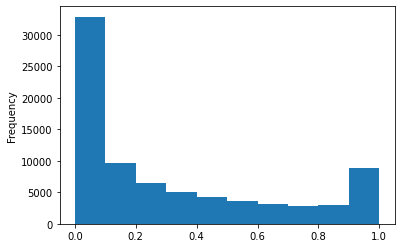

In [73]:
data["perc_premium_paid_by_cash_credit"].plot.hist()

Here, we can see that a majority of people have not paid their premium through cash, but with some other means. 

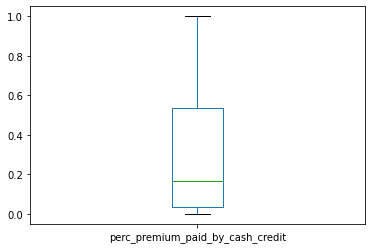

In [74]:
data["perc_premium_paid_by_cash_credit"].plot.box()

We will be using mean to find the central tendency of columns with no outliers and median for columns with outliers.

In [75]:
print(data["perc_premium_paid_by_cash_credit"].mean())

0.31428774122450603


This means that on an average, people have paid 31.42% of their premium in cash.

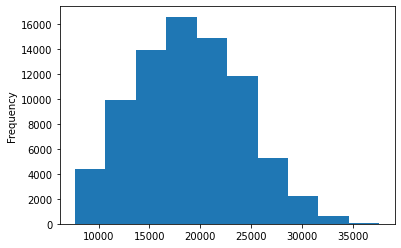

In [76]:
data["age_in_days"].plot.hist()

Here, we can see a majority of our customers lie in the age range of 54-68 years (20,000-25,000 days).

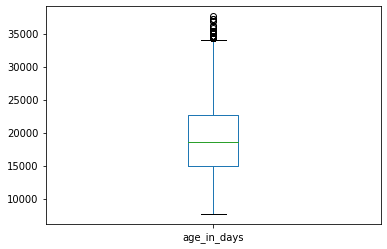

In [77]:
data["age_in_days"].plot.box()

### Here, we can see that "age_in_days" has outliers. Let's make a separate list of all columns having outliers for future ease.

In [78]:
outliers_list = []
outliers_list.append("age_in_days")
outliers_list

['age_in_days']

In [79]:
print(data["age_in_days"].min())
print(data["age_in_days"].max())
print(data["age_in_days"].median())

7670
37602
18625.0


Our youngest customer is 7670 days (approx. 21 years), oldest customer is of 37602 days (approx. 103 years), and the average age of our customers is 18625 days (approx. 51 years).

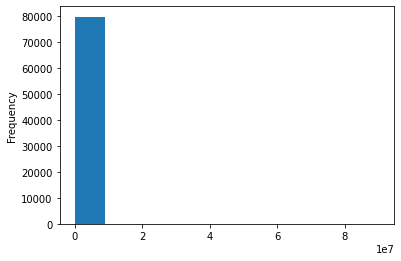

In [80]:
data["Income"].plot.hist()

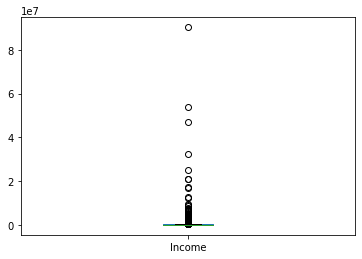

In [81]:
data["Income"].plot.box()

In [82]:
outliers_list.append("Income")
outliers_list

['age_in_days', 'Income']

In [83]:
print(data["Income"].min())
print(data["Income"].max())
print(data["Income"].median())

24030
90262600
166560.0


The lowest income of among our customers is 24,030 Rs. while the highest being 9,02,62,600 RS with an average of 1,66,560 Rs. Note that customers with lower income are less likely to pay premium on time.

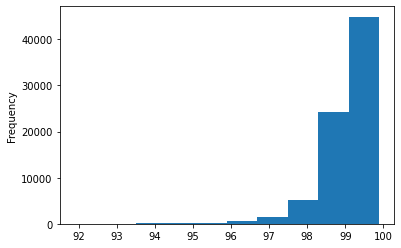

In [84]:
data["application_underwriting_score"].plot.hist()

This is a left-skewed distribution telling us that approximately 40,000 customers have a good (near 100) application underwriting score.

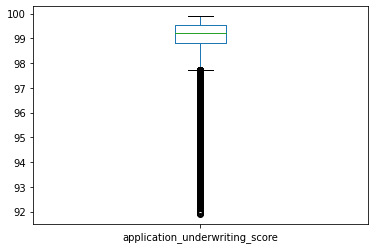

In [85]:
data["application_underwriting_score"].plot.box()

In [86]:
outliers_list.append("application_underwriting_score")
outliers_list

['age_in_days', 'Income', 'application_underwriting_score']

In [87]:
print(data["application_underwriting_score"].min())
print(data["application_underwriting_score"].max())
print(data["application_underwriting_score"].median())

91.9
99.89
99.21


Maximum A.U.S. = 99.89

Minimum A.U.S. = 91.9

Average A.U.S. = 99.21

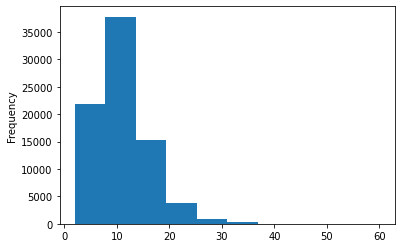

In [88]:
data["no_of_premiums_paid"].plot.hist()

This is a right skewed distribution telling us that approximately 35,000 customers have paid atleast 10 premiums. Note that the number of customers decrease as the number of premiums paid increases, which means they both have a negative correlation.


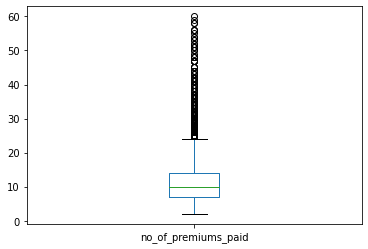

In [89]:
data["no_of_premiums_paid"].plot.box()

In [90]:
outliers_list.append("no_of_premiums_paid")
outliers_list

['age_in_days',
 'Income',
 'application_underwriting_score',
 'no_of_premiums_paid']

In [91]:
print(data["no_of_premiums_paid"].min())
print(data["no_of_premiums_paid"].max())
print(data["no_of_premiums_paid"].median())

2
60
10.0


Lease number of premiums paid by a customer = 2

Most number of premiums paid by a customer = 60

Average premiums paid = 10

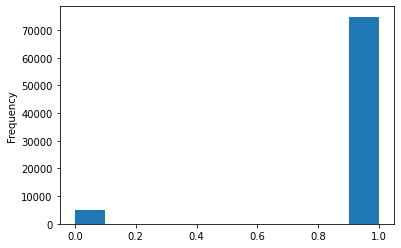

In [92]:
data["target"].plot.hist()

This shows that a high number of customers are likely to pay their premiums on time.

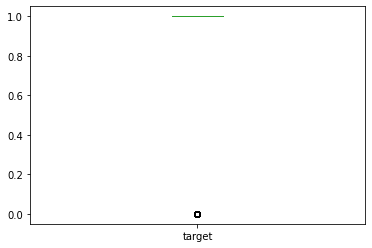

In [93]:
data["target"].plot.box()

# Unvariate Analysis of Categorical Variables

Here, I have treated Count_3-6_months_late, Count_6-12_months_late, and Count_more_than_12_months_late as categorical variables as there is not much variation in their values.

In [94]:
data["Count_3-6_months_late"].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

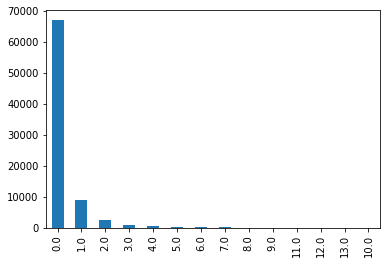

In [95]:
data["Count_3-6_months_late"].value_counts().plot.bar()

In [96]:
data["Count_6-12_months_late"].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

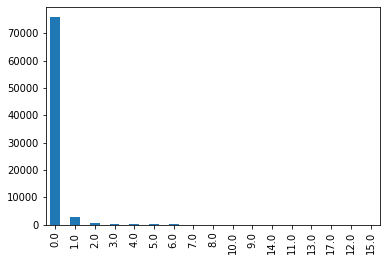

In [97]:
data["Count_6-12_months_late"].value_counts().plot.bar()

In [98]:
data["Count_more_than_12_months_late"].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

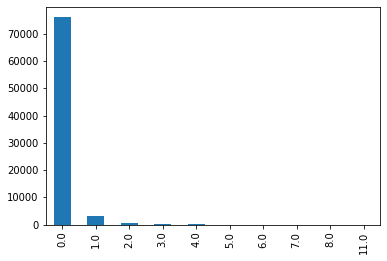

In [99]:
data["Count_more_than_12_months_late"].value_counts().plot.bar()

Here, we can see that usually alot of our customers have paid their premiums on time.

In [100]:
data["sourcing_channel"].value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

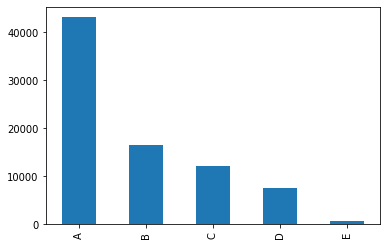

In [101]:
data["sourcing_channel"].value_counts().plot.bar()

In [102]:
data["residence_area_type"].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

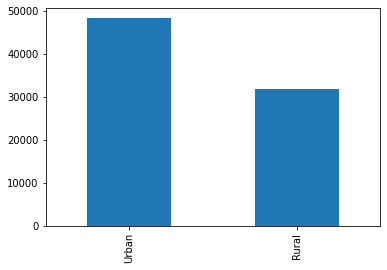

In [103]:
data["residence_area_type"].value_counts().plot.bar()

# Bivariate Analysis
### Our target variable here is continuous, hence we will perform continuous-continuous B.A. and continuous-categorical B.A.

## Proceeding with continuous-continuous bivariate analysis 

In [104]:
data.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


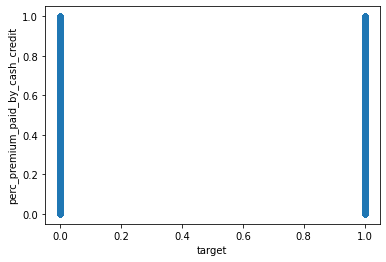

In [105]:
data.plot.scatter("target", "perc_premium_paid_by_cash_credit")

In [106]:
data["target"].corr(data["perc_premium_paid_by_cash_credit"])

-0.24098021041593853

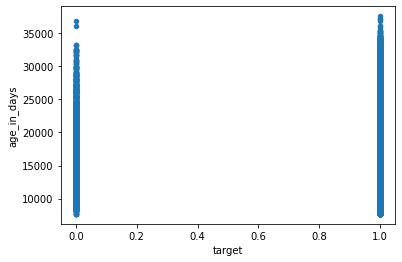

In [107]:
data.plot.scatter("target", "age_in_days")

In [108]:
data["target"].corr(data["age_in_days"])

0.09510293071935437

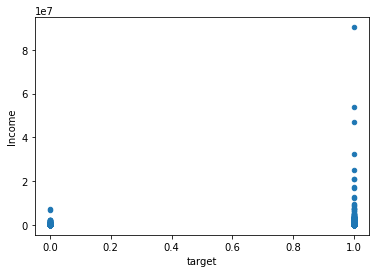

In [109]:
data.plot.scatter("target", "Income")

In [110]:
data["target"].corr(data["Income"])

0.01654120805567502

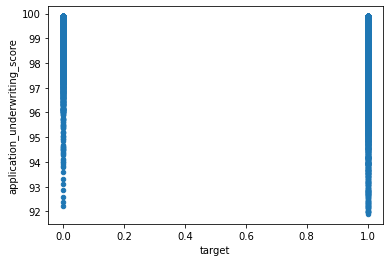

In [111]:
data.plot.scatter("target", "application_underwriting_score")

In [112]:
data["target"].corr(data["application_underwriting_score"])

0.06871504317180845

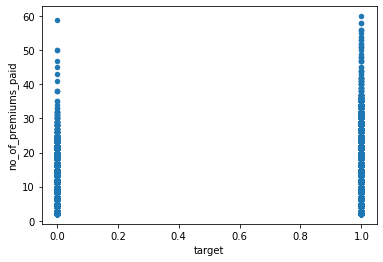

In [113]:
data.plot.scatter("target", "no_of_premiums_paid")

In [114]:
data["target"].corr(data["no_of_premiums_paid"])

0.022664269329842928

### Continuous-Categorical Bivariate Analysis


In [115]:
data.groupby("sourcing_channel")["target"].mean()

sourcing_channel
A    0.945542
B    0.935441
C    0.924994
D    0.916126
E    0.924466
Name: target, dtype: float64

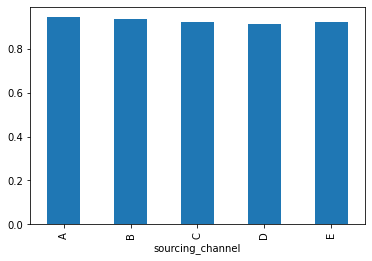

In [116]:
data.groupby("sourcing_channel")["target"].mean().plot.bar()

Here, it is evident that if a customer will pay their premium or not is not much affected by the sourcing channel they use.

In [117]:
data.groupby("residence_area_type")["target"].mean()

residence_area_type
Rural    0.936912
Urban    0.937737
Name: target, dtype: float64

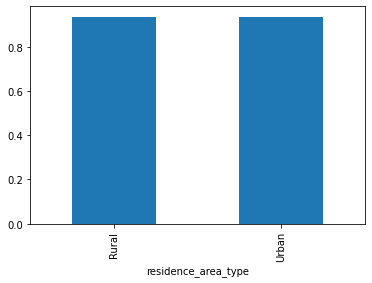

In [118]:
data.groupby("residence_area_type")["target"].mean().plot.bar()

In [119]:
data.groupby("Count_3-6_months_late")["target"].mean()

Count_3-6_months_late
0.0     0.960674
1.0     0.869363
2.0     0.764986
3.0     0.698113
4.0     0.577540
5.0     0.601190
6.0     0.544118
7.0     0.565217
8.0     0.600000
9.0     0.500000
10.0    0.000000
11.0    0.000000
12.0    0.000000
13.0    0.000000
Name: target, dtype: float64

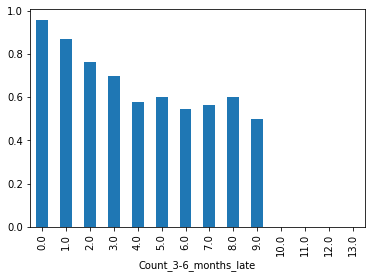

In [120]:
data.groupby("Count_3-6_months_late")["target"].mean().plot.bar()

In [121]:
data.groupby("Count_6-12_months_late")["target"].mean()

Count_6-12_months_late
0.0     0.954570
1.0     0.691045
2.0     0.518038
3.0     0.416404
4.0     0.346154
5.0     0.347826
6.0     0.500000
7.0     0.363636
8.0     0.400000
9.0     0.500000
10.0    0.750000
11.0    0.500000
12.0    0.000000
13.0    0.500000
14.0    0.500000
15.0    1.000000
17.0    0.000000
Name: target, dtype: float64

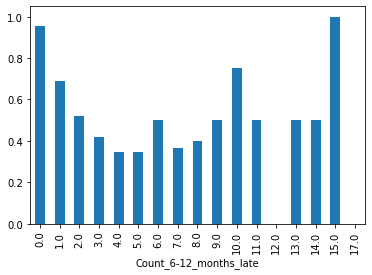

In [122]:
data.groupby("Count_6-12_months_late")["target"].mean().plot.bar()

In [123]:
data.groupby("Count_more_than_12_months_late")["target"].mean()

Count_more_than_12_months_late
0.0     0.950683
1.0     0.721295
2.0     0.542169
3.0     0.437086
4.0     0.479167
5.0     0.461538
6.0     0.333333
7.0     0.333333
8.0     0.500000
11.0    0.000000
Name: target, dtype: float64

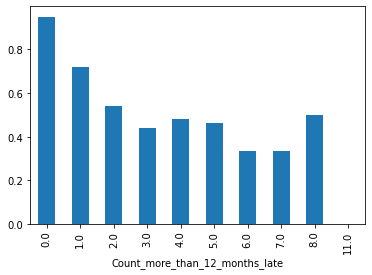

In [124]:
data.groupby("Count_more_than_12_months_late")["target"].mean().plot.bar()

# Missng Value Treatment

In [125]:
data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

### Here, we can see that Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late have 97 missing values and application_underwriting_score has 2974 missing values.

Since we are treating the Count_3-6_months_late, Count_6-12_months_late, and Count_more_than_12_months_late as categorical values, we will be filling their missing values using mode, while application_writing_underscore's missing values will be filled by it's mean

In [126]:
def null(df):
    data['application_underwriting_score'].fillna(data['application_underwriting_score'].mean(),inplace=True)
    data['Count_3-6_months_late'].fillna(0,inplace=True)
    data['Count_6-12_months_late'].fillna(0,inplace=True)
    data['Count_more_than_12_months_late'].fillna(0,inplace=True)
    return df

In [127]:
null(data)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,1


In [128]:
data.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

We can see that no column has anymore missing values.

# Univariate Outlier Detection.

Let's recall our list containing all columns containing outliers.

In [129]:
outliers_list

['age_in_days',
 'Income',
 'application_underwriting_score',
 'no_of_premiums_paid']

Let's start by calculating quantiles and IQRs for each column having outliers.

In [194]:
q1 = int(data.age_in_days.quantile([0.25]))
q3 = int(data.age_in_days.quantile([0.75]))
IQR = q3 - q1
upper_limit = q3+ 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
print("Upper limit is {} and lower limit is {}.".format(upper_limit,lower_limit))

Upper limit is 34129.0 and lower limit is 3481.0.


In [195]:
data.loc[data["age_in_days"]>upper_limit, "age_in_days"] = np.mean(data["age_in_days"])

In [196]:
data.loc[data["age_in_days"]<lower_limit, "age_in_days"] = np.mean(data["age_in_days"])

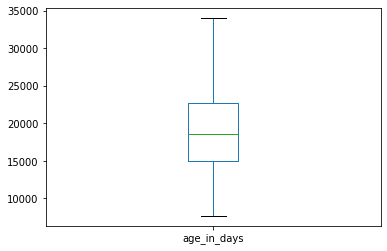

In [197]:
data["age_in_days"].plot.box()

In [209]:
q1 = int(data.Income.quantile(0.25))
q3 = int(data.Income.quantile(0.75))
IQR = q3 - q1
upper_limit = q3+ 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
print("Upper limit is {} and lower limit is {}.".format(upper_limit,lower_limit))
print(q3,q1,IQR)

Upper limit is 408085.0 and lower limit is -72035.0.
228040 108010 120030


In [204]:
data.loc[data["Income"]>upper_limit, "Income"] = np.mean(data["Income"])

In [205]:
data.loc[data["Income"]<lower_limit, "Income"] = np.mean(data["Income"])

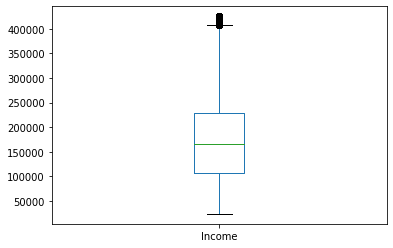

In [206]:
data["Income"].plot.box()

In [184]:
data.head(100)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,41753,0.725,26295,216070,0.0,0.0,0.0,98.60,14,A,Urban,0
96,112926,0.966,28119,191160,0.0,0.0,0.0,98.57,28,B,Urban,1
97,27602,0.000,11695,162550,0.0,0.0,0.0,98.34,10,B,Urban,1
98,103017,0.000,15707,90090,0.0,0.0,0.0,99.79,7,B,Rural,1


In [208]:
data.Income.quantile(0.25)

108010.0